# Data Visualization and Prep:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
from sklearn.metrics import classification_report
rcParams['figure.figsize'] = 10, 5 

In [5]:
df = pd.read_csv('/content/users.csv')
df = df.drop('UserID', axis = 1)
print(df.tail(),'\n\n')
print(df.info(),'\n\n')
print(df.describe())

     Gender  Age  Estimated Salary  Purchased
763       0   63               101          0
764       0   27               122          0
765       0   30               121          0
766       1   47               126          1
767       0   23                93          0 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Gender            768 non-null    int64
 1   Age               768 non-null    int64
 2   Estimated Salary  768 non-null    int64
 3   Purchased         768 non-null    int64
dtypes: int64(4)
memory usage: 24.1 KB
None 


           Gender         Age  Estimated Salary   Purchased
count  768.000000  768.000000        768.000000  768.000000
mean     0.348958   33.240885        120.894531    0.348958
std      0.476951   11.760232         31.972618    0.476951
min      0.000000   21.000000          0.000000    0.000000


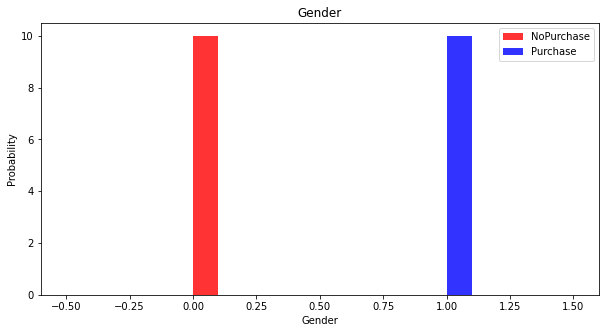

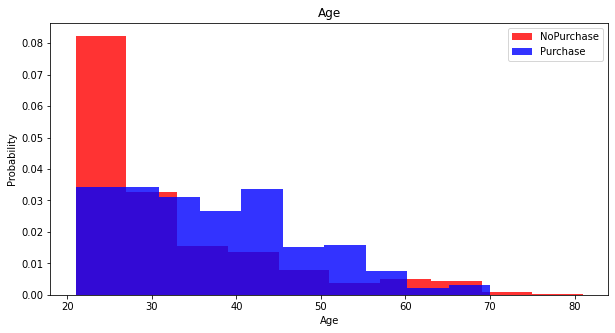

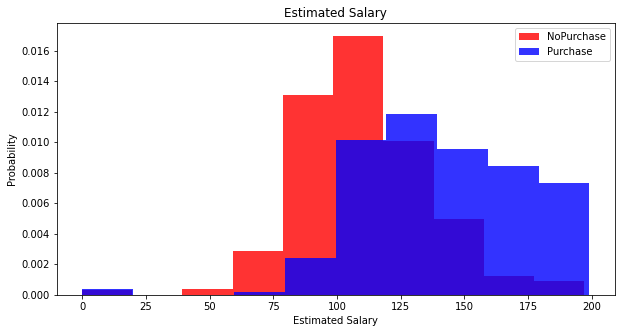

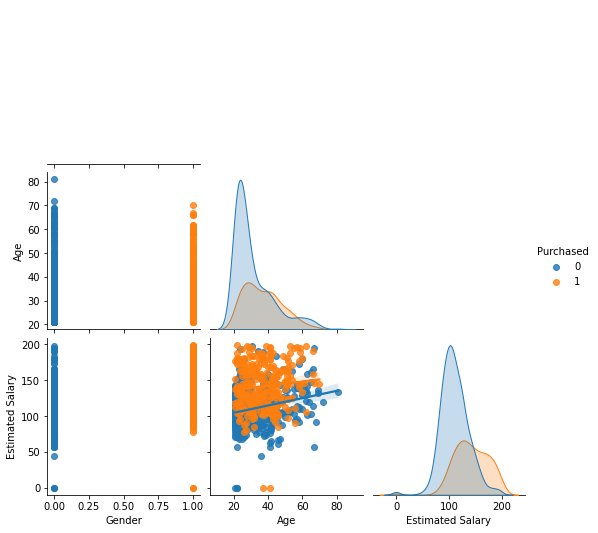

In [6]:
# Data Representation:
for label in df.columns[:-1]:
  plt.hist(df[df['Purchased']==0][label], color = 'red', label = 'NoPurchase', density = True, alpha = 0.8)
  plt.hist(df[df['Purchased']==1][label], color = 'blue', label = 'Purchase', density = True, alpha = 0.8)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()
  print('\n')


sns.pairplot(df, hue="Purchased", corner=True, kind='reg')

As we can see from the representation of the target value versus the features, Gender has a full correlation with the target value, which means that we can use Gender alone to predict the target value of "Purchased." However, as a practice, I am using all of the available features.

Note: "Perhaps there is something wrong with the data itself. Maybe the Gender column is replicated as the target column Purchased."

In [51]:
# Preparing Data for Analysis:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values
#I'm Normalizing feature values before analysis:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
print(x)
#Over sampling the data before analysis:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler()
# x, y = ros.fit_resample(x,y)

[[1.         0.48333333 0.74371859]
 [0.         0.16666667 0.42713568]
 [1.         0.18333333 0.91959799]
 ...
 [0.         0.15       0.6080402 ]
 [1.         0.43333333 0.63316583]
 [0.         0.03333333 0.46733668]]


In [52]:
x_train, x_test = np.split(x, [int(0.75*len(x))])
y_train, y_test = np.split(y, [int(0.75*len(x))])
print(y_train.shape, x_train.shape)
print(y_test.shape, x_test.shape)

(576,) (576, 3)
(192,) (192, 3)


# KNN:

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
from sklearn.metrics import classification_report

In [54]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [55]:
y_pred = knn.predict(x_test)

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        70

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



# Logistic Regression:

In [57]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [58]:
LR.fit(x_train,y_train)

LogisticRegression()

In [59]:
y_pred = LR.predict(x_test)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        70

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



# Support Vector Machines:

## SVC:

In [61]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        70

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



## Linear SVC:

In [63]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
# Another way is by using:
# from sklearn.svm import SVC
# svc = SVC(kernel = 'linear')
# svc.fit(x_train,y_train)
# y_pred = svc.predict(x_test)

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        70

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



# Neural Network:

In [65]:
import tensorflow as tf

In [66]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
  ax1.plot(history.history['loss'], color = 'blue',label='loss')
  ax1.plot(history.history['val_loss'], color = 'yellow', label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary Crossentropy')
  ax1.grid(True)
  ax1.legend()

  ax2.plot(history.history['accuracy'], color = 'red',label='accuracy')
  ax2.plot(history.history['val_accuracy'], color = 'green', label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  ax2.legend()
  plt.show()

In [67]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation = 'relu',input_shape=(3,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
  ])
  # The last layer is just reflecting the predictions to either 0, or 1, and this will help us classify the outcomes.
  nn_model.compile(optimizer= tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',
                  metrics='accuracy')
  history = nn_model.fit(
    x_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0 
    )
  return nn_model, history
# "validation_split" is used to split the training data and have aportion of the data that is used for validation during the training by Tesnorflow.
# "verbose" is set to zero to prevent the model from printing any thing.

16 nodes, dropout 0, lr 0.01, batch size 32


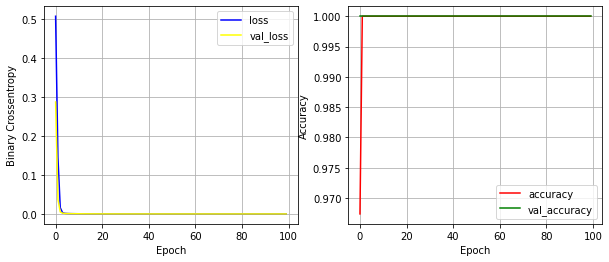

6/6 [==============================] - 0s 3ms/step - loss: 6.1497e-06 - accuracy: 1.0000
16 nodes, dropout 0, lr 0.01, batch size 64


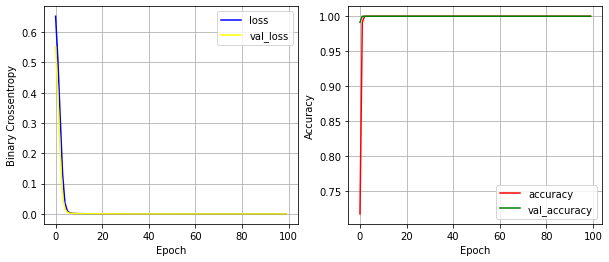

6/6 [==============================] - 0s 3ms/step - loss: 2.4101e-05 - accuracy: 1.0000
16 nodes, dropout 0, lr 0.01, batch size 128


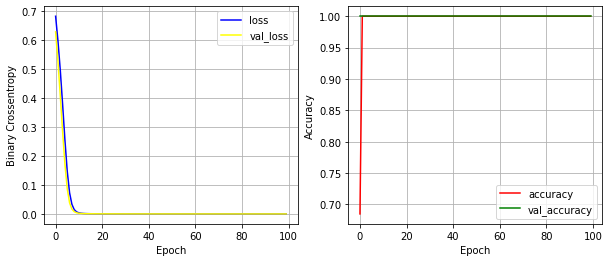

6/6 [==============================] - 0s 3ms/step - loss: 2.7244e-05 - accuracy: 1.0000
16 nodes, dropout 0, lr 0.005, batch size 32


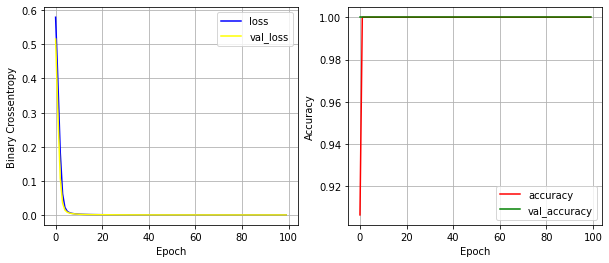

6/6 [==============================] - 0s 3ms/step - loss: 2.5100e-05 - accuracy: 1.0000
16 nodes, dropout 0, lr 0.005, batch size 64


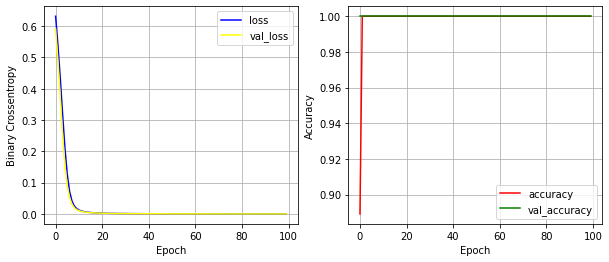

6/6 [==============================] - 0s 3ms/step - loss: 1.0118e-04 - accuracy: 1.0000
16 nodes, dropout 0, lr 0.005, batch size 128


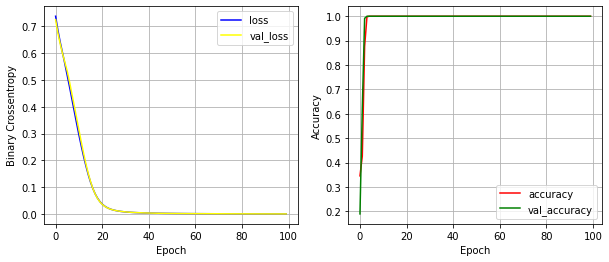

6/6 [==============================] - 0s 2ms/step - loss: 4.8938e-04 - accuracy: 1.0000
16 nodes, dropout 0, lr 0.001, batch size 32


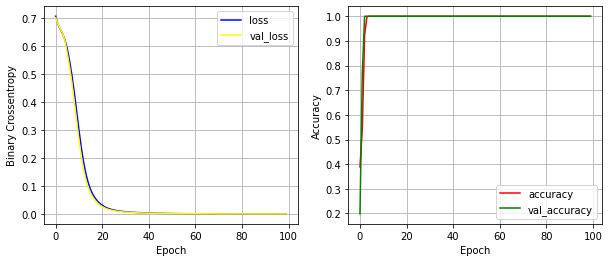

6/6 [==============================] - 0s 2ms/step - loss: 1.7373e-04 - accuracy: 1.0000
16 nodes, dropout 0, lr 0.001, batch size 64


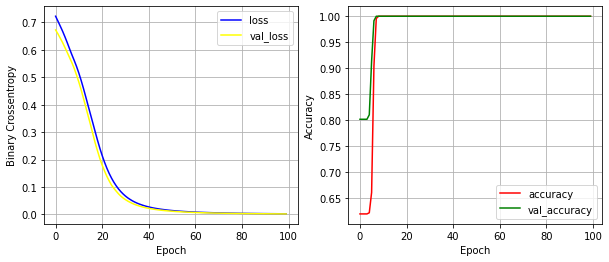

6/6 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000
16 nodes, dropout 0, lr 0.001, batch size 128


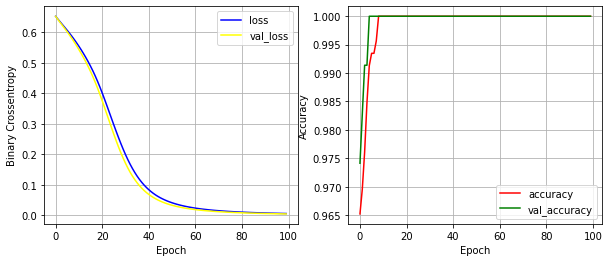

6/6 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000
16 nodes, dropout 0.2, lr 0.01, batch size 32


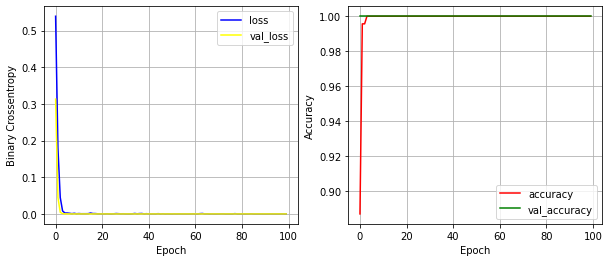

6/6 [==============================] - 0s 3ms/step - loss: 3.0315e-10 - accuracy: 1.0000
16 nodes, dropout 0.2, lr 0.01, batch size 64


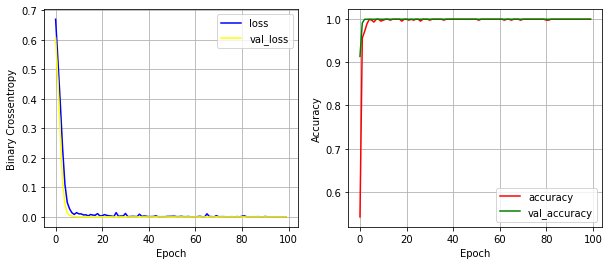

6/6 [==============================] - 0s 3ms/step - loss: 4.2618e-08 - accuracy: 1.0000
16 nodes, dropout 0.2, lr 0.01, batch size 128


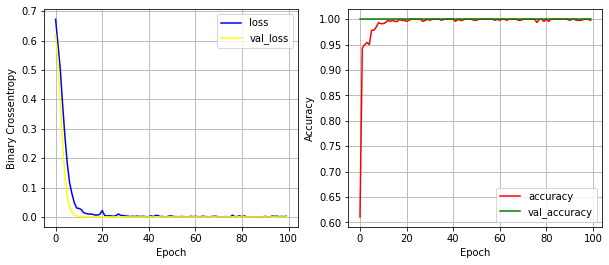

6/6 [==============================] - 0s 3ms/step - loss: 2.5350e-07 - accuracy: 1.0000
16 nodes, dropout 0.2, lr 0.005, batch size 32


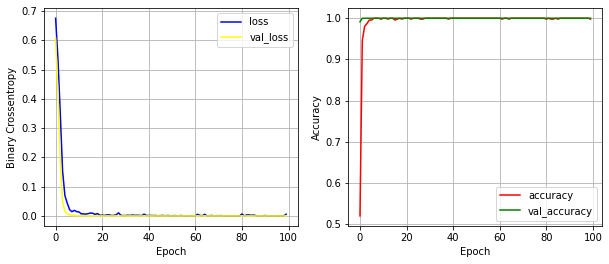

6/6 [==============================] - 0s 4ms/step - loss: 5.8505e-07 - accuracy: 1.0000
16 nodes, dropout 0.2, lr 0.005, batch size 64


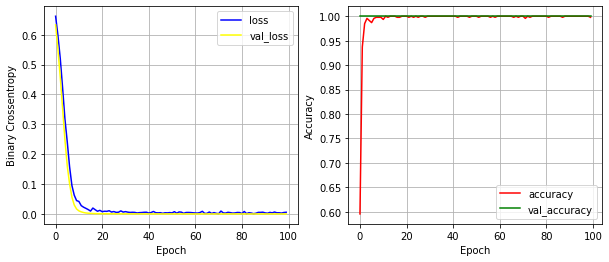

6/6 [==============================] - 0s 3ms/step - loss: 2.7903e-06 - accuracy: 1.0000
16 nodes, dropout 0.2, lr 0.005, batch size 128


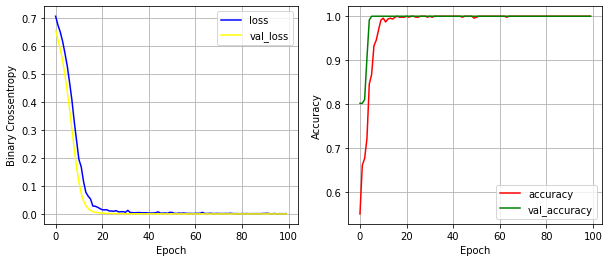

6/6 [==============================] - 0s 3ms/step - loss: 1.3447e-05 - accuracy: 1.0000
16 nodes, dropout 0.2, lr 0.001, batch size 32


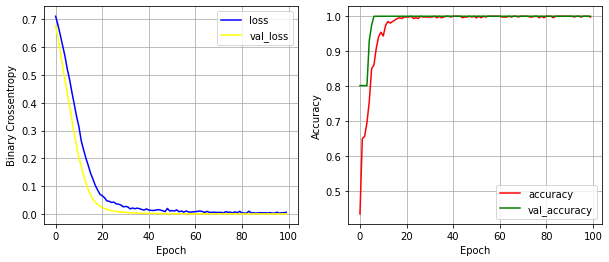

6/6 [==============================] - 0s 3ms/step - loss: 6.9886e-05 - accuracy: 1.0000
16 nodes, dropout 0.2, lr 0.001, batch size 64


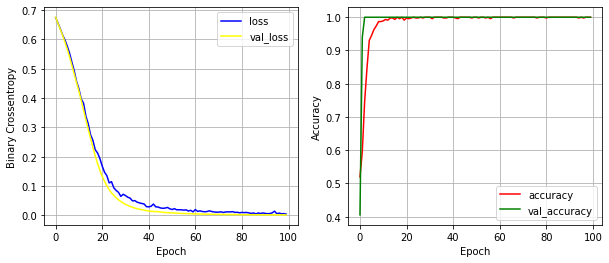

6/6 [==============================] - 0s 4ms/step - loss: 4.6100e-04 - accuracy: 1.0000
16 nodes, dropout 0.2, lr 0.001, batch size 128


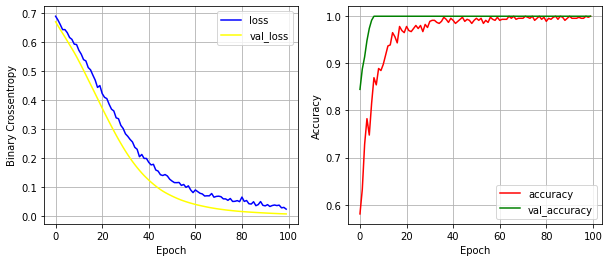

6/6 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 1.0000
32 nodes, dropout 0, lr 0.01, batch size 32


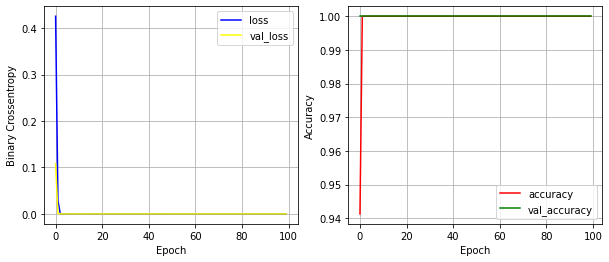

6/6 [==============================] - 0s 3ms/step - loss: 6.5940e-07 - accuracy: 1.0000
32 nodes, dropout 0, lr 0.01, batch size 64


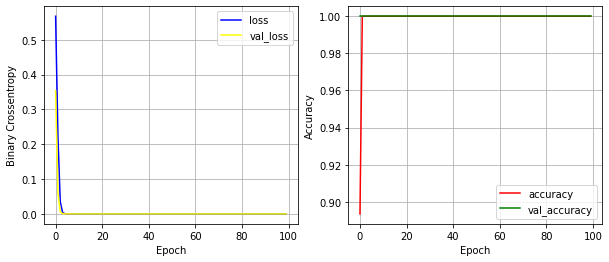

6/6 [==============================] - 0s 3ms/step - loss: 2.3099e-07 - accuracy: 1.0000
32 nodes, dropout 0, lr 0.01, batch size 128


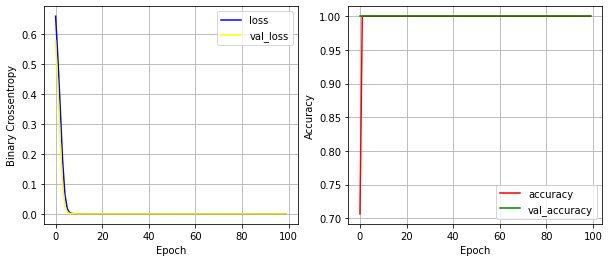

6/6 [==============================] - 0s 3ms/step - loss: 1.0156e-05 - accuracy: 1.0000
32 nodes, dropout 0, lr 0.005, batch size 32


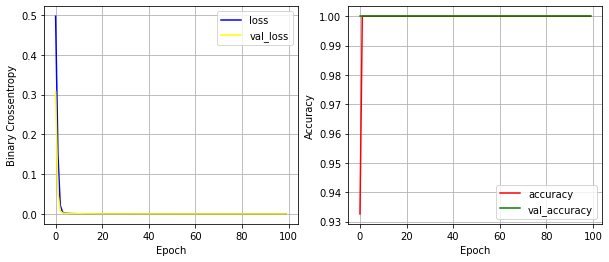

6/6 [==============================] - 0s 4ms/step - loss: 4.2693e-06 - accuracy: 1.0000
32 nodes, dropout 0, lr 0.005, batch size 64


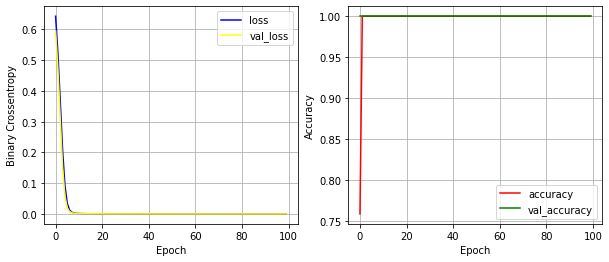

6/6 [==============================] - 0s 3ms/step - loss: 1.3068e-05 - accuracy: 1.0000
32 nodes, dropout 0, lr 0.005, batch size 128


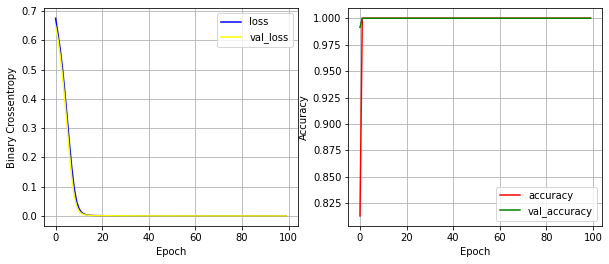

6/6 [==============================] - 0s 3ms/step - loss: 4.9863e-05 - accuracy: 1.0000
32 nodes, dropout 0, lr 0.001, batch size 32


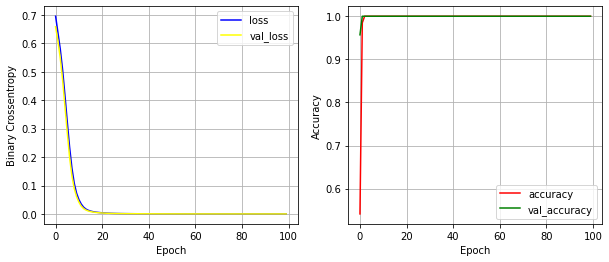

6/6 [==============================] - 0s 3ms/step - loss: 4.6848e-05 - accuracy: 1.0000
32 nodes, dropout 0, lr 0.001, batch size 64


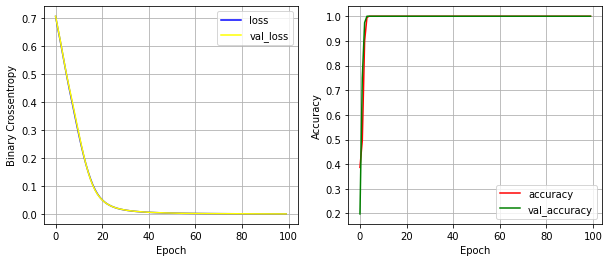

6/6 [==============================] - 0s 5ms/step - loss: 6.9716e-04 - accuracy: 1.0000
32 nodes, dropout 0, lr 0.001, batch size 128


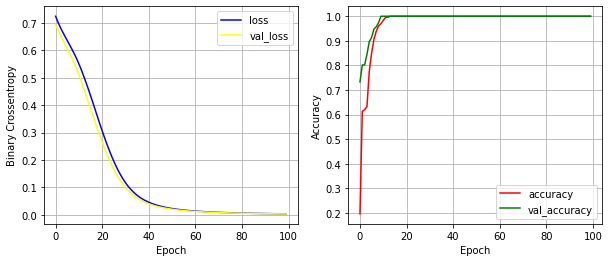

6/6 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000
32 nodes, dropout 0.2, lr 0.01, batch size 32


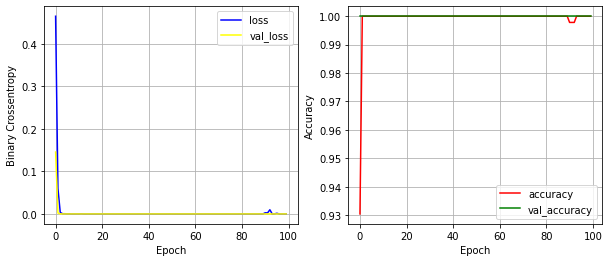

6/6 [==============================] - 0s 4ms/step - loss: 3.5908e-10 - accuracy: 1.0000
32 nodes, dropout 0.2, lr 0.01, batch size 64


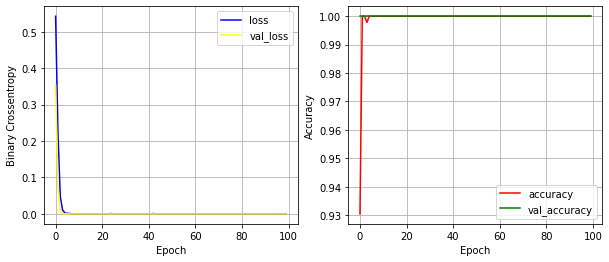

6/6 [==============================] - 0s 3ms/step - loss: 1.9619e-09 - accuracy: 1.0000
32 nodes, dropout 0.2, lr 0.01, batch size 128


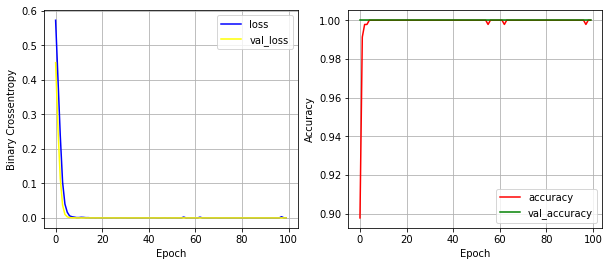

6/6 [==============================] - 0s 3ms/step - loss: 9.0610e-06 - accuracy: 1.0000
32 nodes, dropout 0.2, lr 0.005, batch size 32


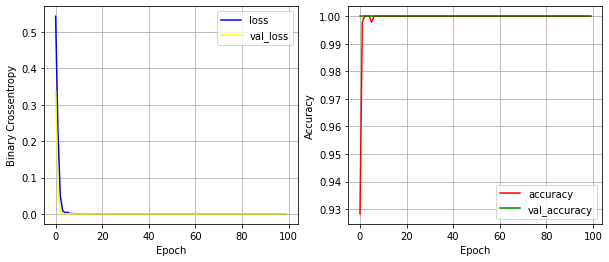

6/6 [==============================] - 0s 3ms/step - loss: 5.0813e-08 - accuracy: 1.0000
32 nodes, dropout 0.2, lr 0.005, batch size 64


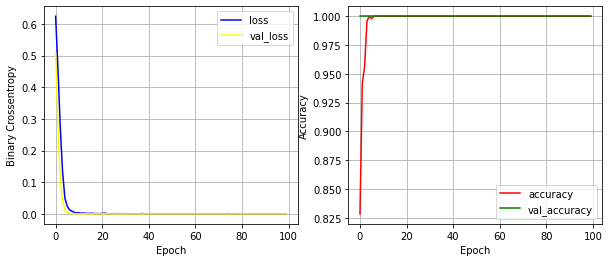

6/6 [==============================] - 0s 5ms/step - loss: 8.0616e-07 - accuracy: 1.0000
32 nodes, dropout 0.2, lr 0.005, batch size 128


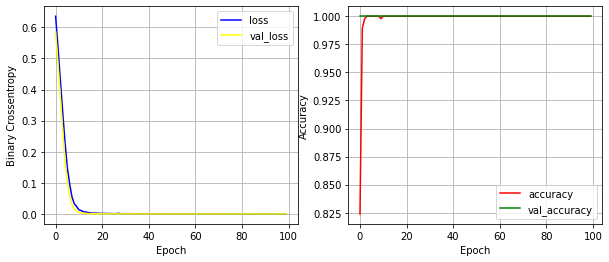

6/6 [==============================] - 0s 3ms/step - loss: 5.2038e-06 - accuracy: 1.0000
32 nodes, dropout 0.2, lr 0.001, batch size 32


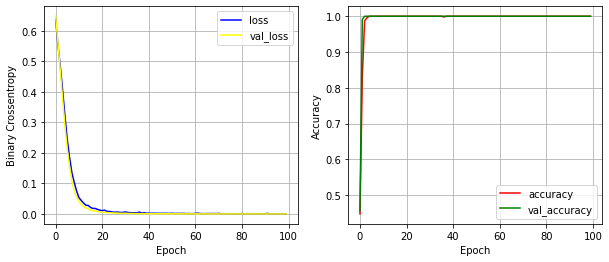

6/6 [==============================] - 0s 4ms/step - loss: 4.4159e-05 - accuracy: 1.0000
32 nodes, dropout 0.2, lr 0.001, batch size 64


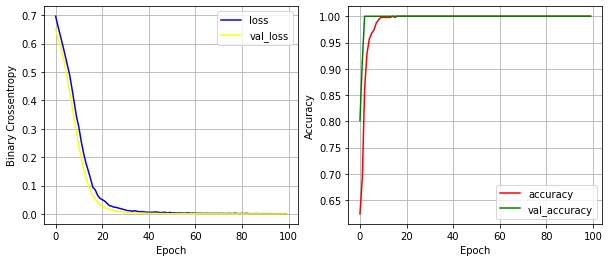

6/6 [==============================] - 0s 3ms/step - loss: 1.0416e-04 - accuracy: 1.0000
32 nodes, dropout 0.2, lr 0.001, batch size 128


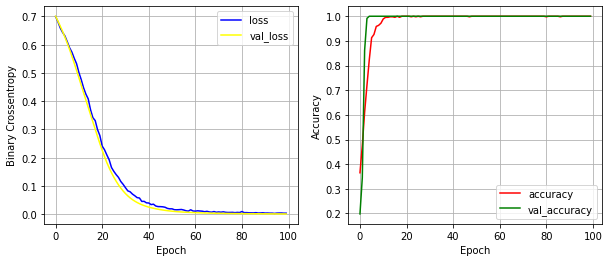

6/6 [==============================] - 0s 3ms/step - loss: 8.6735e-04 - accuracy: 1.0000
64 nodes, dropout 0, lr 0.01, batch size 32


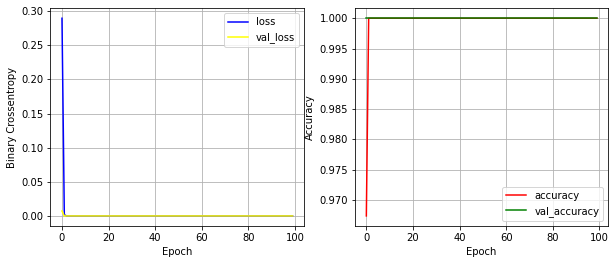

6/6 [==============================] - 0s 4ms/step - loss: 3.6805e-09 - accuracy: 1.0000
64 nodes, dropout 0, lr 0.01, batch size 64


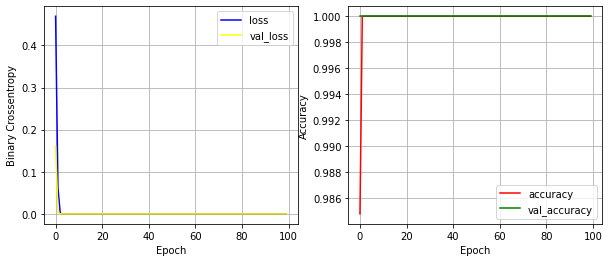

6/6 [==============================] - 0s 3ms/step - loss: 3.6647e-07 - accuracy: 1.0000
64 nodes, dropout 0, lr 0.01, batch size 128


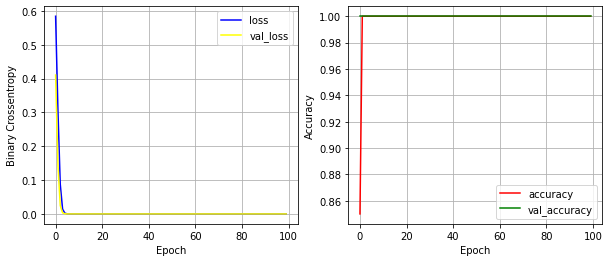

6/6 [==============================] - 0s 4ms/step - loss: 9.8077e-07 - accuracy: 1.0000
64 nodes, dropout 0, lr 0.005, batch size 32


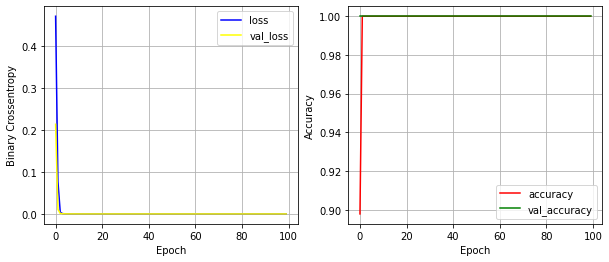

6/6 [==============================] - 0s 3ms/step - loss: 5.7616e-07 - accuracy: 1.0000
64 nodes, dropout 0, lr 0.005, batch size 64


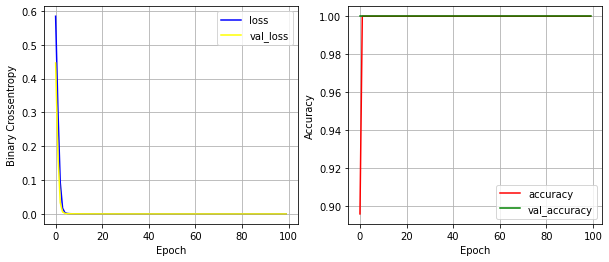

6/6 [==============================] - 0s 3ms/step - loss: 7.7138e-06 - accuracy: 1.0000
64 nodes, dropout 0, lr 0.005, batch size 128


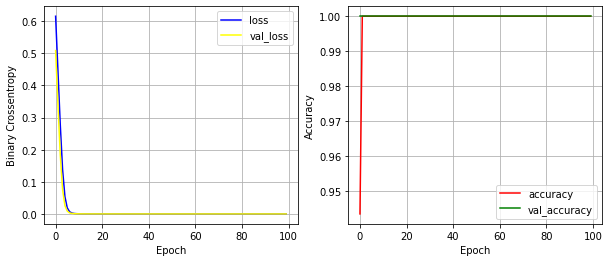

6/6 [==============================] - 0s 3ms/step - loss: 5.2626e-06 - accuracy: 1.0000
64 nodes, dropout 0, lr 0.001, batch size 32


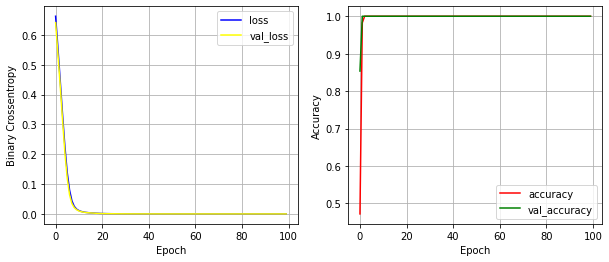

6/6 [==============================] - 0s 3ms/step - loss: 7.4907e-06 - accuracy: 1.0000
64 nodes, dropout 0, lr 0.001, batch size 64


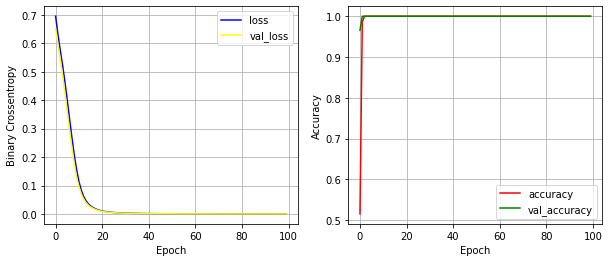

6/6 [==============================] - 0s 3ms/step - loss: 4.6810e-05 - accuracy: 1.0000
64 nodes, dropout 0, lr 0.001, batch size 128


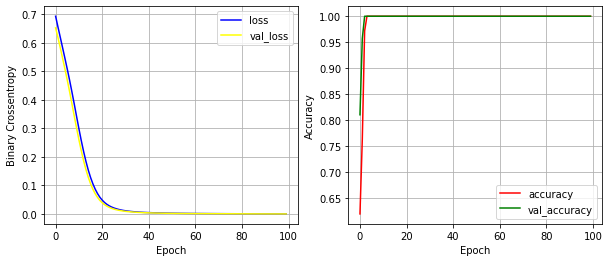

6/6 [==============================] - 0s 3ms/step - loss: 3.1421e-04 - accuracy: 1.0000
64 nodes, dropout 0.2, lr 0.01, batch size 32


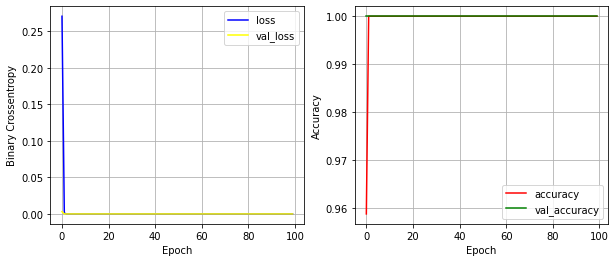

6/6 [==============================] - 0s 3ms/step - loss: 6.8335e-10 - accuracy: 1.0000
64 nodes, dropout 0.2, lr 0.01, batch size 64


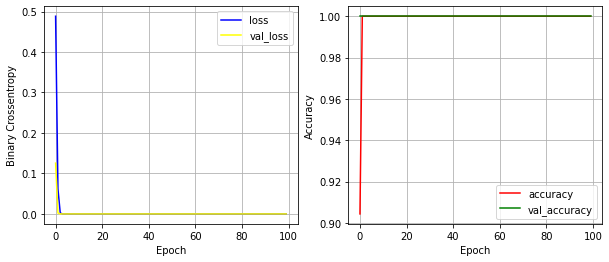

6/6 [==============================] - 0s 3ms/step - loss: 1.0739e-07 - accuracy: 1.0000
64 nodes, dropout 0.2, lr 0.01, batch size 128


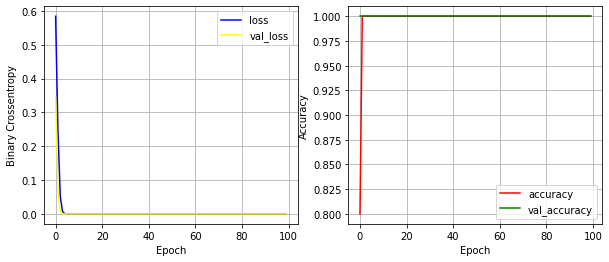

6/6 [==============================] - 0s 4ms/step - loss: 5.1144e-08 - accuracy: 1.0000
64 nodes, dropout 0.2, lr 0.005, batch size 32


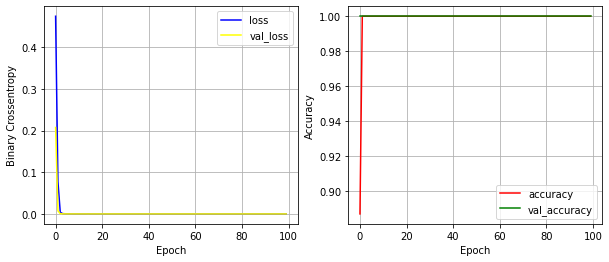

6/6 [==============================] - 0s 5ms/step - loss: 2.9252e-08 - accuracy: 1.0000
64 nodes, dropout 0.2, lr 0.005, batch size 64


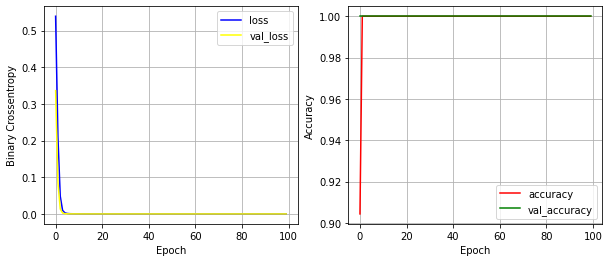

6/6 [==============================] - 0s 3ms/step - loss: 3.2205e-07 - accuracy: 1.0000
64 nodes, dropout 0.2, lr 0.005, batch size 128


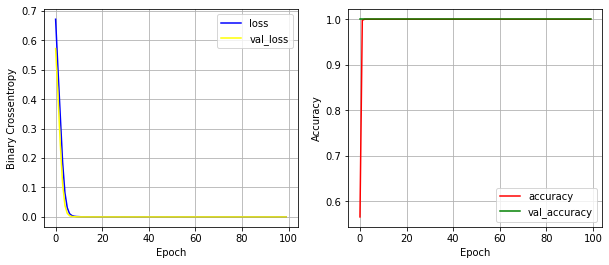

6/6 [==============================] - 0s 3ms/step - loss: 1.8081e-06 - accuracy: 1.0000
64 nodes, dropout 0.2, lr 0.001, batch size 32


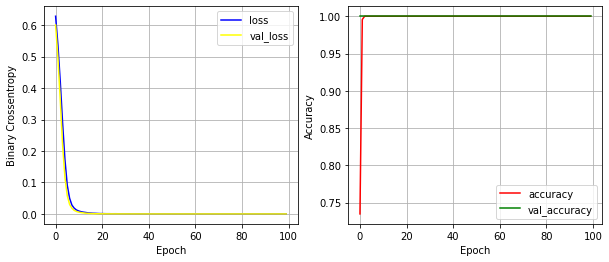

6/6 [==============================] - 0s 3ms/step - loss: 2.3556e-06 - accuracy: 1.0000
64 nodes, dropout 0.2, lr 0.001, batch size 64


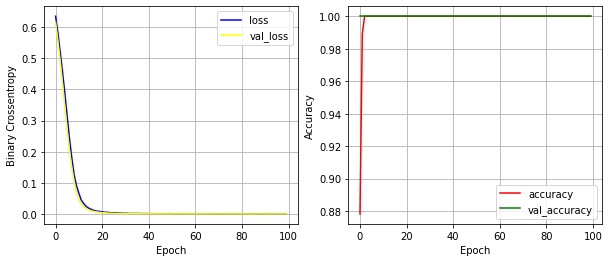

6/6 [==============================] - 0s 3ms/step - loss: 2.8477e-05 - accuracy: 1.0000
64 nodes, dropout 0.2, lr 0.001, batch size 128


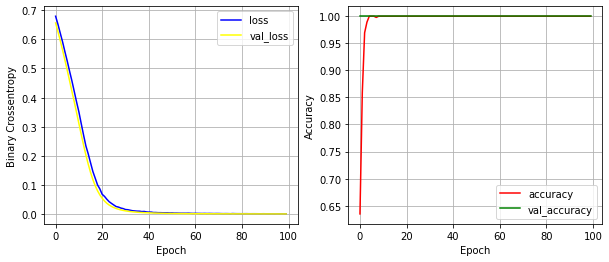

6/6 [==============================] - 0s 3ms/step - loss: 1.9386e-04 - accuracy: 1.0000


In [68]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in  [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss  = model.evaluate(x_test,y_test)[0]
        if val_loss < least_val_loss:
          least_val_loss =  val_loss
          least_loss_model = model

In [69]:
print(least_loss_model.summary())
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

# The outputs are either so close to zero, or so close to one since we used sigmoid function to represent the outcome.

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                64        
                                                                 
 dropout_18 (Dropout)        (None, 16)                0         
                                                                 
 dense_28 (Dense)            (None, 16)                272       
                                                                 
 dropout_19 (Dropout)        (None, 16)                0         
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
None
6/6 [==============================] - 0s 2ms/step


array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        70

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

